In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vinay7410
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess


100%|██████████| 428M/428M [00:00<00:00, 509MB/s]


In [3]:
!ls

sample_data  toronto-emotional-speech-set-tess


In [4]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=9a98e2e6315c3658832cc3ee1e705d228922137fb256ceaa5044892a02a8e30d
  Stored in directory: /root/.cache/pip/wheels/60/90/3c/4b5996a95d363fa14525597a19146a940bec467b44b2a14580
Successfully built python_speech_features


In [5]:
!pip install Ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.4 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import os
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [8]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname,filename))
    print(filename)
    label=filename.split('_')[-1]
    print(label)
    label=label.split('.')[0]
    print(label)
    break




YAF_sheep_disgust.wav
disgust.wav
disgust
YAF_haze_neutral.wav
neutral.wav
neutral
OAF_white_disgust.wav
disgust.wav
disgust
OAF_time_ps.wav
ps.wav
ps
OAF_chalk_fear.wav
fear.wav
fear
OAF_dip_sad.wav
sad.wav
sad
YAF_deep_ps.wav
ps.wav
ps
YAF_chat_angry.wav
angry.wav
angry
OAF_name_happy.wav
happy.wav
happy
YAF_germ_fear.wav
fear.wav
fear
OAF_search_neutral.wav
neutral.wav
neutral
YAF_vine_happy.wav
happy.wav
happy
OAF_near_angry.wav
angry.wav
angry
YAF_dime_sad.wav
sad.wav
sad


In [9]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname,filename))
    label=filename.split('_')[-1]
    label=label.split('.')[0]
    labels.append(label.lower())

print("datasets is loaded")


datasets is loaded


In [10]:
paths2=[]
labels2=[]
for dirname, _, filenames in os.walk('/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data'):
  for filename in filenames:
    paths2.append(os.path.join(dirname,filename))
    label=filename.split('_')[-1]
    label=label.split('.')[0]
    labels2.append(label.lower())

print("datasets_2 is loaded")


datasets_2 is loaded


In [11]:
paths2[:5]

['/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_sheep_disgust.wav',
 '/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_fail_disgust.wav',
 '/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_mood_disgust.wav',
 '/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_jar_disgust.wav',
 '/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_jug_disgust.wav']

In [12]:
labels2[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [13]:
paths[:5]

['/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_disgust/YAF_sheep_disgust.wav',
 '/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_disgust/YAF_fail_disgust.wav',
 '/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_disgust/YAF_mood_disgust.wav',
 '/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_disgust/YAF_jar_disgust.wav',
 '/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_disgust/YAF_jug_disgust.wav']

In [14]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [15]:
labels[-5:]

['sad', 'sad', 'sad', 'sad', 'sad']

In [16]:
df=pd.DataFrame()
df['speech']=paths
df['labels']=labels
df.head(5)

,speech,labels
0,/content/toronto-emotional-speech-set-tess/TES...,disgust
1,/content/toronto-emotional-speech-set-tess/TES...,disgust
2,/content/toronto-emotional-speech-set-tess/TES...,disgust
3,/content/toronto-emotional-speech-set-tess/TES...,disgust
4,/content/toronto-emotional-speech-set-tess/TES...,disgust


In [17]:
len(df)

2800

In [18]:
df['labels'].value_counts()

,count
labels,
disgust,400
neutral,400
ps,400
fear,400
sad,400
angry,400
happy,400


In [19]:
df2=pd.DataFrame()
df2['speech']=paths2
df2['labels']=labels2
df2.head(5)

,speech,labels
0,/content/toronto-emotional-speech-set-tess/tes...,disgust
1,/content/toronto-emotional-speech-set-tess/tes...,disgust
2,/content/toronto-emotional-speech-set-tess/tes...,disgust
3,/content/toronto-emotional-speech-set-tess/tes...,disgust
4,/content/toronto-emotional-speech-set-tess/tes...,disgust


In [20]:
len(df2)

2800

In [21]:
df2['labels'].value_counts()

,count
labels,
disgust,400
neutral,400
ps,400
fear,400
sad,400
angry,400
happy,400


In [23]:
combined_df = pd.concat([df, df2], ignore_index=True)

In [25]:
len(combined_df)

5600

In [24]:
df=combined_df
df['labels'].value_counts()

,count
labels,
disgust,800
neutral,800
ps,800
fear,800
sad,800
angry,800
happy,800


**EXPLORTORY DATA ANALYSIS**

<Axes: xlabel='labels', ylabel='count'>

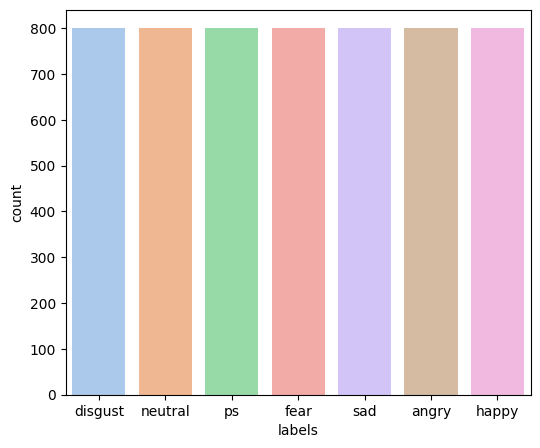

In [26]:
plt.figure(figsize=(6,5))
sns.countplot(x=df['labels'],palette='pastel')


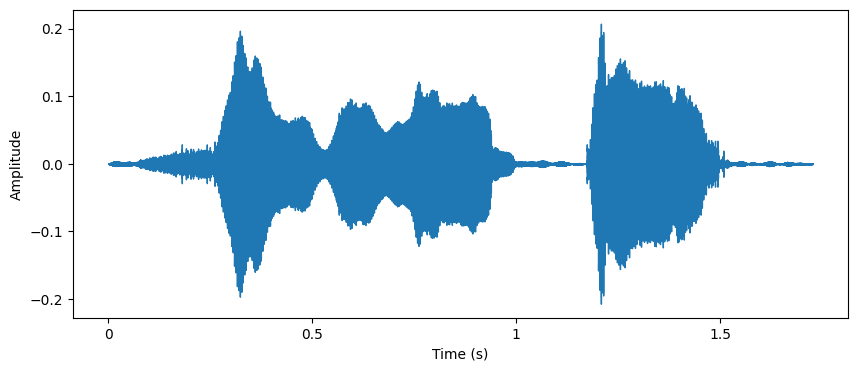

In [27]:
import matplotlib.pyplot as plt
import librosa, librosa.display

y, sr = librosa.load("/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav")
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
# just checking that how to form a waveform for a single audio file

In [28]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

def spectogram(data, sr, emotion):
  x=librosa.stft(data)
  xdb=librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

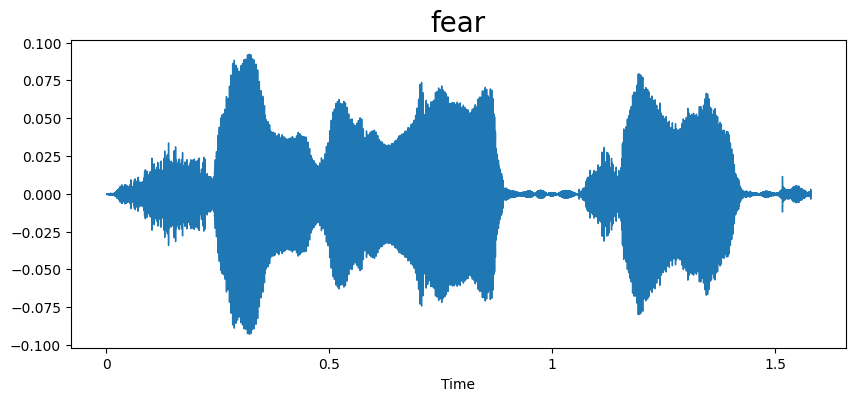

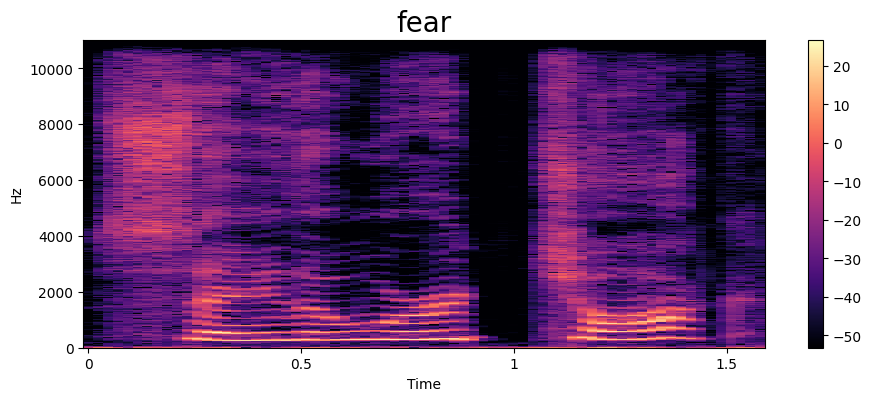

In [29]:
emotion='fear'
path=np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


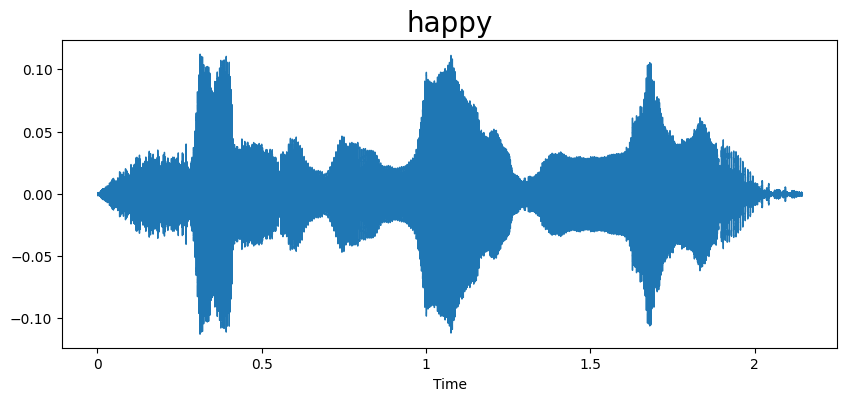

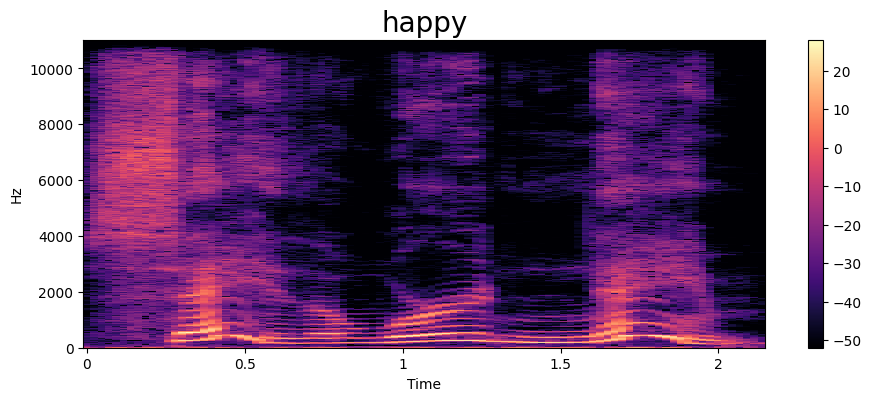

In [30]:
emotion='happy'
path=np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


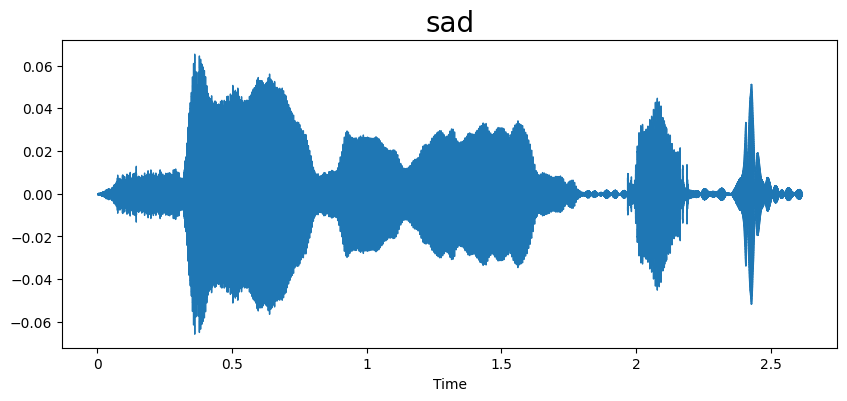

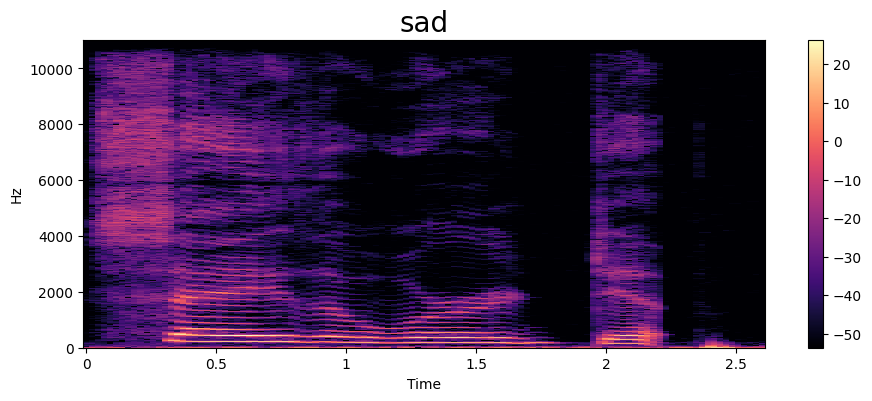

In [31]:
emotion='sad'
path=np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate=librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [32]:
def extract_mfcc(filename):
  y,sr=librosa.load(filename, duration=3, offset=0.5)
  mfcc=np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [33]:
extract_mfcc(df['speech'][0])

array([-4.0734845e+02,  6.3182484e+01, -2.5542996e+00,  5.6102097e+01,
       -1.3147747e+01, -7.0697987e-01, -2.8312874e+00, -2.0157516e+01,
       -1.0460369e+01, -5.2792335e+00, -1.0586001e+01,  2.5623291e+00,
       -7.8375096e+00,  7.1907425e-01, -4.6791959e+00, -8.6232748e+00,
        2.9278514e+00, -5.3981681e+00, -8.8359518e+00,  7.8490251e-01,
       -6.9053178e+00,  2.2243080e+00, -2.6301239e+00,  3.9193444e+00,
       -2.9221084e+00, -3.5049353e+00, -4.3356581e+00,  1.8423012e+00,
       -8.9325315e-01,  8.9546509e+00,  3.2948190e-01,  6.6887822e+00,
        6.2202895e-01,  3.6338851e+00,  2.2651508e+00,  2.2053249e+00,
        1.9876717e+00,  3.0552680e+00,  2.3389192e+00,  2.1924722e+00],
      dtype=float32)

In [34]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [37]:
X_mfcc

,speech
0,"[-407.34845, 63.182484, -2.5542996, 56.102097,..."
1,"[-375.45026, 96.70443, -17.356222, 19.265192, ..."
2,"[-445.00266, 108.02552, -0.47705504, 22.148668..."
3,"[-395.54895, 102.61529, -5.4394956, -4.4147997..."
4,"[-394.1898, 89.69493, -17.317238, 27.419287, -..."
...,...
5595,"[-414.75748, 65.35131, 26.050138, 24.609568, 4..."
5596,"[-422.66013, 104.21277, 32.023544, 36.860615, ..."
5597,"[-433.25858, 86.88761, 27.718102, 38.007874, 3..."
5598,"[-415.88757, 71.2195, 24.460564, 30.355497, -0..."


In [40]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(5600, 40)

In [41]:
X=np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

In [44]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['labels']])


In [49]:
y.shape

(5600, 7)

In [51]:
y=y.toarray()

In [52]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model=Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history=model.fit(X,y, validation_split=0.2, epochs=50, batch_size=64,shuffle=True)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9770 - loss: 0.0699 - val_accuracy: 0.9902 - val_loss: 0.0290
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9861 - loss: 0.0479 - val_accuracy: 0.9875 - val_loss: 0.0409
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9876 - loss: 0.0472 - val_accuracy: 0.9964 - val_loss: 0.0090
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9775 - loss: 0.0691 - val_accuracy: 0.9920 - val_loss: 0.0295
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9848 - loss: 0.0400 - val_accuracy: 0.9857 - val_loss: 0.0348
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9829 - loss: 0.0521 - val_accuracy: 0.9946 - val_loss: 0.0147
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9854 - loss: 0.0512 - val_accuracy: 0.9929 - val_loss: 0.0214
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9909 - loss: 0.0252 - val_accuracy: 0.9946 - val_l

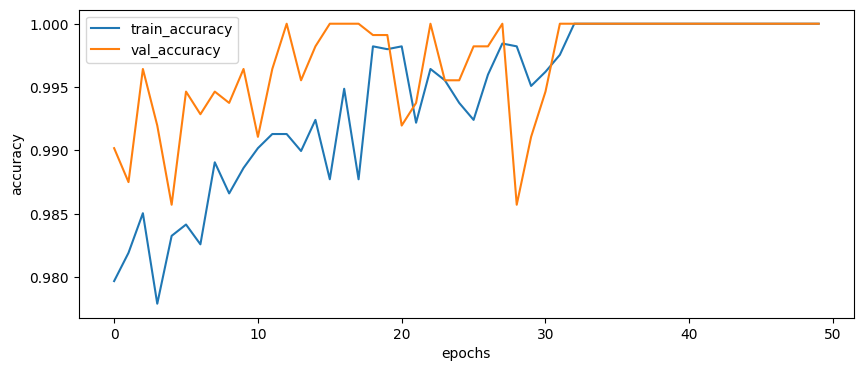

TypeError: 'list' object cannot be interpreted as an integer

In [58]:
epochs=50
epochs=list(range(50))

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.figure(figsize=(10,4))
plt.plot(epochs, acc, label='train_accuracy')
plt.plot(epochs, val_acc, label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

epochs_range=range(epochs)

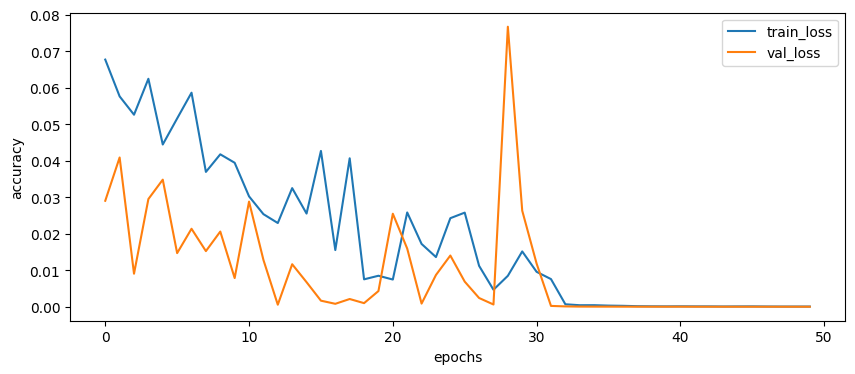

TypeError: 'list' object cannot be interpreted as an integer

In [59]:
epochs=50
epochs=list(range(50))

loss=history.history['loss']
val_loss=history.history['val_loss']
plt.figure(figsize=(10,4))
plt.plot(epochs, loss, label='train_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

epochs_range=range(epochs)

making the pipeline fo the above code

Step 1: Loading datasets...
✅ Dataset 1 loaded with 2800 samples
✅ Dataset 2 loaded with 2800 samples
✅ Combined dataset has 5600 samples and 7 classes
Step 2: Extracting MFCC features...
✅ Features extracted and data split into train/test sets
Step 3: Building model...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

Step 4: Training model...
Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4793 - loss: 1.3375 - val_accuracy: 0.8464 - val_loss: 0.4133
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8763 - loss: 0.3459 - val_accuracy: 0.9411 - val_loss: 0.1503
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9528 - loss: 0.1526 - val_accuracy: 0.9750 - val_loss: 0.0874
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9617 - loss: 0.1193 - val_accuracy: 0.9625 - val_loss: 0.0933
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9642 - loss: 0.1284 - val_accuracy: 0.9696 - val_loss: 0.0764
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9592 - loss: 0.1251 - val_accuracy: 0.9812 - val_loss: 0.0602
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9713 - loss: 0.0880 - val_accuracy: 0.9929 - val_loss: 0.0230
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9780 - loss: 0.0714 - val_a

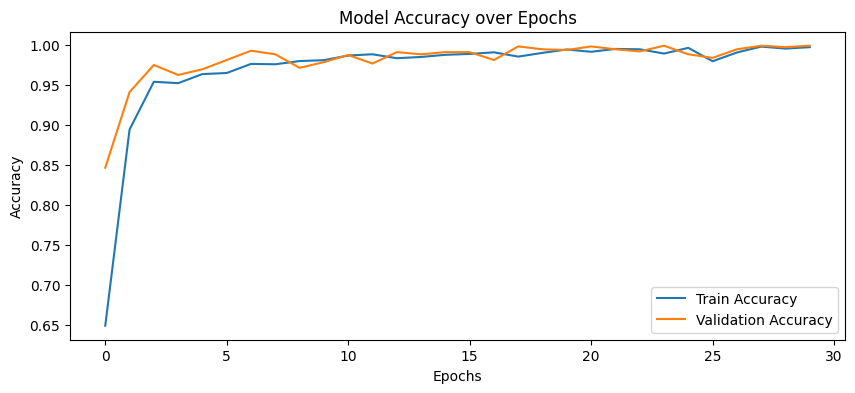

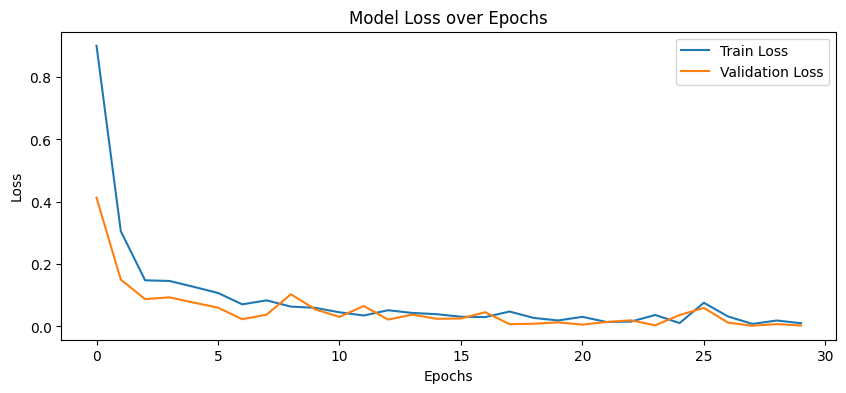


✅ Pipeline completed successfully and model is ready!


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils import to_categorical

print("Step 1: Loading datasets...")

# ------------------------------
# Load First Dataset
# ------------------------------
paths, labels = [], []
for dirname, _, filenames in os.walk('/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1].split('.')[0]
        labels.append(label.lower())
df = pd.DataFrame({'speech': paths, 'labels': labels})
print(f"✅ Dataset 1 loaded with {df.shape[0]} samples")

# ------------------------------
# Load Second Dataset
# ------------------------------
paths2, labels2 = [], []
for dirname, _, filenames in os.walk('/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths2.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1].split('.')[0]
        labels2.append(label.lower())
df2 = pd.DataFrame({'speech': paths2, 'labels': labels2})
print(f"✅ Dataset 2 loaded with {df2.shape[0]} samples")

# ------------------------------
# Combine Both Datasets
# ------------------------------
combined_df = pd.concat([df, df2], ignore_index=True)
print(f"✅ Combined dataset has {combined_df.shape[0]} samples and {combined_df['labels'].nunique()} classes")

# ------------------------------
# Step 2: Feature Extraction (MFCC)
# ------------------------------
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

print("Step 2: Extracting MFCC features...")
X_mfcc = combined_df['speech'].apply(lambda x: extract_mfcc(x))
X = np.array([x for x in X_mfcc])
X = np.expand_dims(X, -1)

# Encode labels
le = LabelEncoder()
y_int = le.fit_transform(combined_df['labels'])
y = to_categorical(y_int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("✅ Features extracted and data split into train/test sets")

# ------------------------------
# Step 3: Build Model
# ------------------------------
print("Step 3: Building model...")
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ------------------------------
# Step 4: Train Model
# ------------------------------
print("Step 4: Training model...")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=30, batch_size=64, shuffle=True, verbose=1)

# ------------------------------
# Step 5: Evaluate Model
# ------------------------------
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Training Accuracy: {train_acc:.4f}")
print(f"✅ Testing Accuracy: {test_acc:.4f}")

# ------------------------------
# Step 6: Plot Accuracy & Loss
# ------------------------------
epochs = range(len(history.history['accuracy']))

plt.figure(figsize=(10,4))
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy over Epochs")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(epochs, history.history['loss'], label='Train Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss over Epochs")
plt.show()

print("\n✅ Pipeline completed successfully and model is ready!")

# Save model & encoder globally for prediction
trained_model = model
label_encoder = le


In [67]:
import numpy as np
import librosa

def predict_emotion(audio_path):
    # Extract MFCC for the new file
    mfcc = extract_mfcc(audio_path)
    mfcc = np.expand_dims(mfcc, axis=[0, -1])   # (1, 40, 1)

    # Predict
    preds = trained_model.predict(mfcc)
    emotion = label_encoder.inverse_transform([np.argmax(preds)])[0]
    confidence = np.max(preds)

    print(f"\n🎤 Predicted Emotion: {emotion.upper()} with Confidence: {confidence:.2f}")

# ------------------------------
# User Input
# ------------------------------
user_path = "/content/WhatsApp Audio 2025-09-19 at 23.46.30_993e9c71.mp3"
predict_emotion(user_path)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

🎤 Predicted Emotion: DISGUST with Confidence: 0.97
